In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#sns.set(font_scale = 2,rc={'text.usetex': True})
sns.set_style("whitegrid")
sns.set(font_scale = 2)

In [63]:
def rename_dataset_name(name): 
    rename_map = {
        'breast_cancer': "Breast Cancer", 
        'german_credit': "German Credit"
    }
    
    new_name = rename_map.get(name)
    if not new_name: 
        return name.capitalize()
    else: 
        return new_name
    

In [64]:
df = pd.read_csv("OTHER_ALGO_results.csv")
df_lptml = pd.read_csv("LPTML_results.csv")
df["std_accuracy"] = pd.Series(data=[0 for _ in range(len(df))])
#df_lptml["dataset_name"] = df_lptml[["dataset_name", "dataset_dimensions(elements|features|classes)"]].apply(lambda x: x["dataset_name"] + " " + x["dataset_dimensions(elements|features|classes)"].replace("|",","), axis=1)
df_lptml.rename(columns={
    "avg_precision": "precision",
    "avg_recall": "recall",
    "avg_f1": "f1",
    "avg_accuracy": "accuracy",
}, inplace=True)
# Drop for now std except accuracy, needed for plots
df_lptml = df_lptml[["algorithm","dataset_name","dataset_dimensions(elements|features|classes)","PCA","adversarial_noise","accuracy", "precision","recall","f1","std_accuracy"]]
df_lptml.head()

,algorithm,dataset_name,dataset_dimensions(elements|features|classes),PCA,adversarial_noise,accuracy,precision,recall,f1,std_accuracy
0,LPTML,soybean,(150|4|3),4,0,0.944,0.945,0.942,0.941,0.056
1,EUCLIDEAN,soybean,(150|4|3),4,0,0.964,0.965,0.963,0.961,0.035
2,LPTML,iris,(150|4|3),4,0,0.951,0.952,0.950,0.949,0.050
3,EUCLIDEAN,iris,(150|4|3),4,0,0.965,0.965,0.965,0.963,0.031
4,LPTML,poisoned_synthetic,(106|2|2),2,0,0.822,0.827,0.829,0.818,0.125


In [65]:
df["algorithm"] = df["algorithm"].apply(lambda x: x.replace("_Supervised", ""))
df = df.append(df_lptml)
df["dataset_name"] = df["dataset_name"].apply(lambda x: rename_dataset_name(x))
df.describe(include="all")
df.reset_index(inplace=True, drop=True)
df = df[df["algorithm"] != "RCA"]

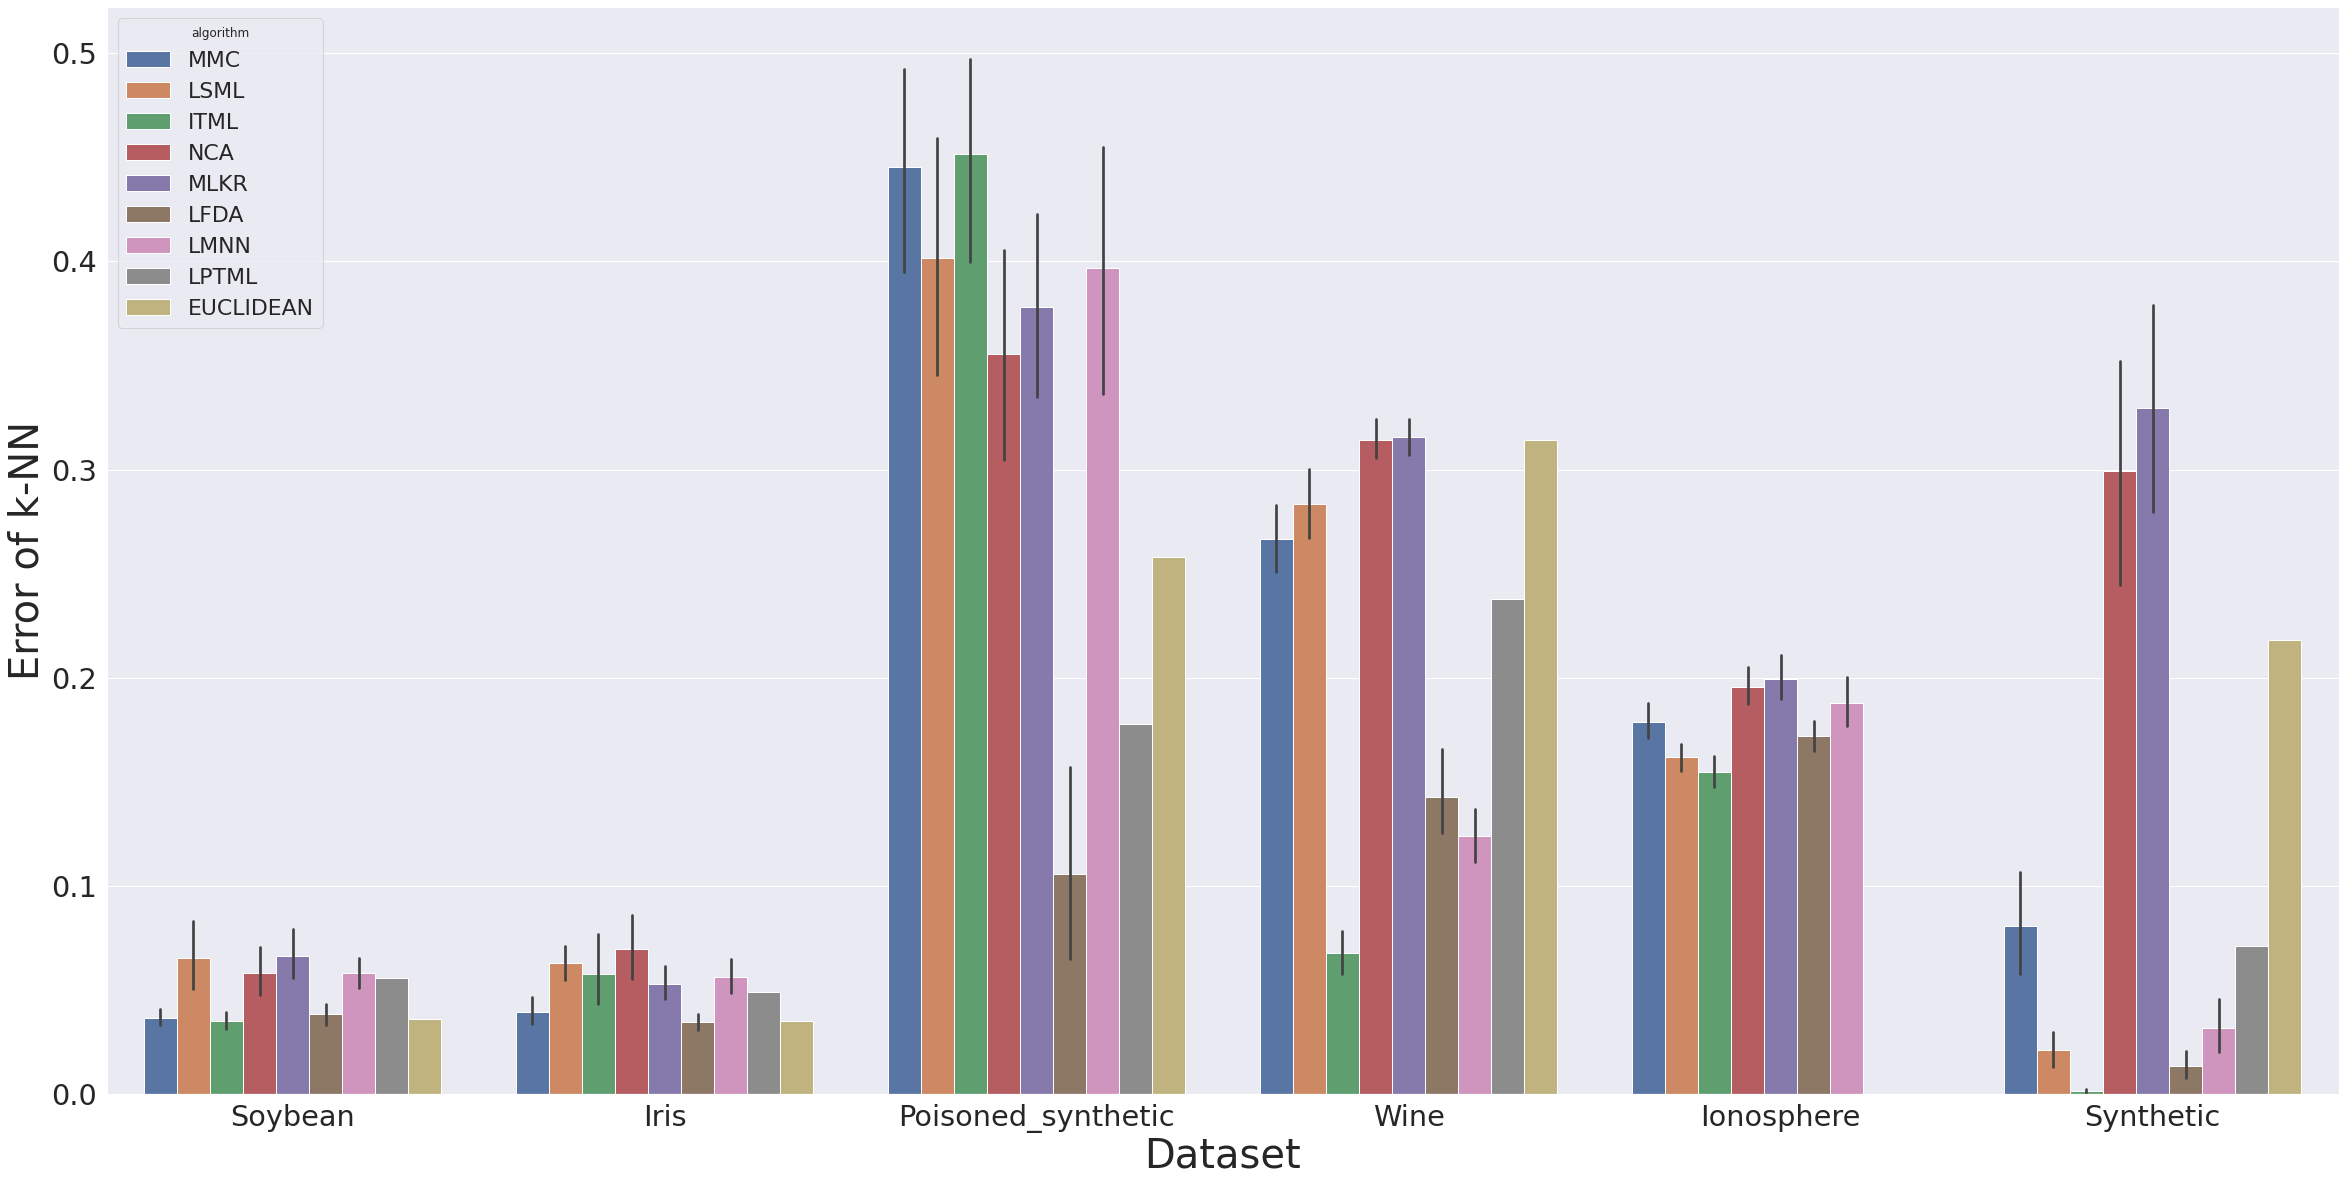

In [66]:
# Accuracy plot
plt.figure(figsize=(40, 20))
df["accuracy"] = 1 - df["accuracy"]
accuracy_df = df[["algorithm", "dataset_name", "adversarial_noise", "accuracy", "std_accuracy"]][df["adversarial_noise"] == 0]
accuracy_df.rename(columns={"accuracy": "error"}, inplace=True)
ax = sns.barplot(x="dataset_name", y="error", data=accuracy_df, hue="algorithm")
ax.set_xlabel("Dataset", fontsize=40)
ax.set_ylabel("Error of k-NN", fontsize=40)
ax.tick_params(labelsize="large")
plt.savefig("accuracy_plot.pdf")

In [67]:
accuracy_df.groupby(["algorithm", "dataset_name"])["error"].mean()

algorithm  dataset_name      
EUCLIDEAN  Iris                  0.035000
           Poisoned_synthetic    0.258000
           Soybean               0.036000
           Synthetic             0.218000
           Wine                  0.314000
ITML       Ionosphere            0.154947
           Iris                  0.057833
           Poisoned_synthetic    0.451294
           Soybean               0.035333
           Synthetic             0.001389
           Wine                  0.067692
LFDA       Ionosphere            0.171957
           Iris                  0.034667
           Poisoned_synthetic    0.105882
           Soybean               0.038333
           Synthetic             0.013657
           Wine                  0.142937
LMNN       Ionosphere            0.188037
           Iris                  0.056333
           Poisoned_synthetic    0.396941
           Soybean               0.058333
           Synthetic             0.031944
           Wine                  0.123916
LPTM

In [61]:
accuracy_df.groupby(["algorithm", "dataset_name"])["error"].std()

algorithm  dataset_name      
EUCLIDEAN  Iris                       NaN
           Poisoned_synthetic         NaN
           Soybean                    NaN
           Synthetic                  NaN
           Wine                       NaN
ITML       Ionosphere            0.026749
           Iris                  0.066142
           Poisoned_synthetic    0.175608
           Soybean               0.014242
           Synthetic             0.004650
           Wine                  0.037683
LFDA       Ionosphere            0.028301
           Iris                  0.014122
           Poisoned_synthetic    0.168302
           Soybean               0.018211
           Synthetic             0.024914
           Wine                  0.076476
LMNN       Ionosphere            0.058724
           Iris                  0.030886
           Poisoned_synthetic    0.215465
           Soybean               0.028121
           Synthetic             0.048362
           Wine                  0.045933
LPTM

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


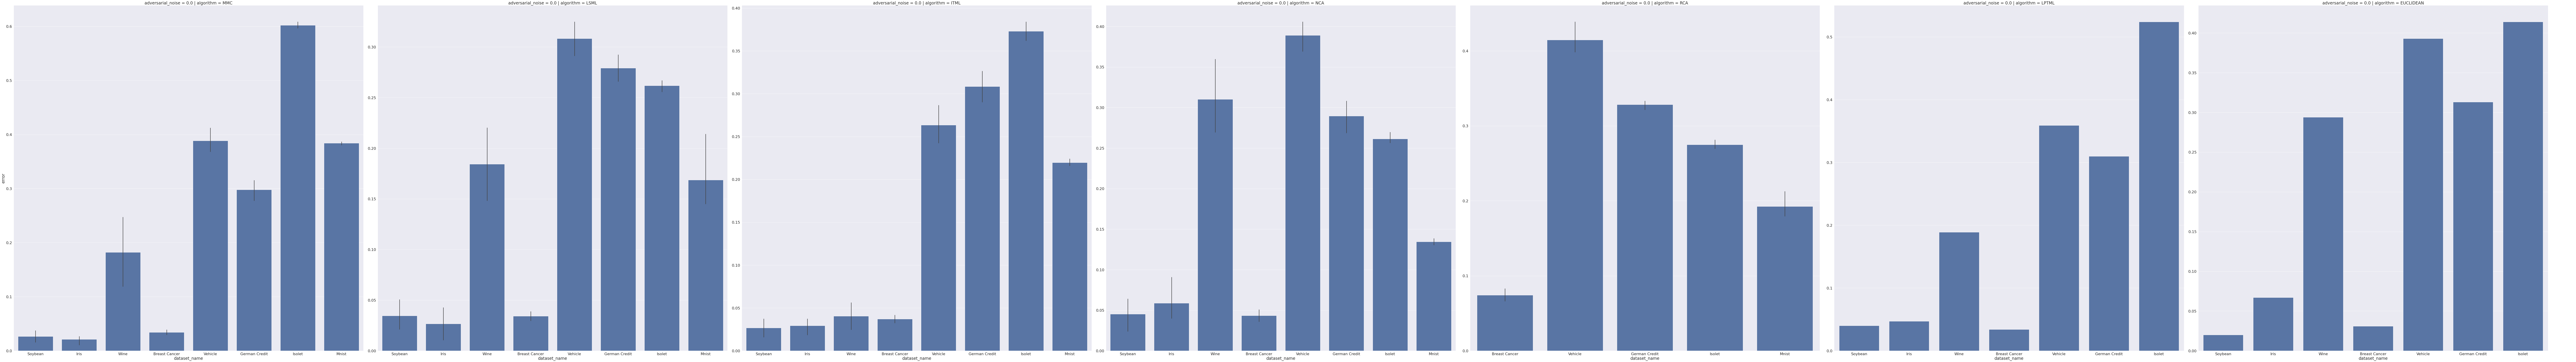

In [12]:
sns.set(font_scale = 2)
g = sns.FacetGrid(accuracy_df, col="algorithm", row="adversarial_noise", sharex=False, sharey=False, height=30)
g.map(sns.barplot, "dataset_name", "error").add_legend()
plt.savefig("final.png")

In [ ]:
len(df)